In [123]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from astroquery.vizier import Vizier
from sklearn import preprocessing
import numpy as np

iram_catalogue = 'B/iram/30m_pi'

data_pd = pd.read_csv('data_reduced.csv', delimiter='\t', index_col='Source')
data = pd.read_csv('data_reduced.csv', delimiter='\t')
#data = pd.DataFrame(data_pd).to_numpy()

In [124]:
#Vizier(catalog=iram_catalogue).get_catalog_metadata()
data_pd = data_pd.drop(columns=['CH3CN_ii', 'HCN_ii'])#,'HNCO_ii'])
data_pd = data_pd.drop(index='Orion-KL')
data = data.drop(index=49)

In [125]:
data_pd

,13CS_ii,SiO_ii,CCH_ii,N2Hp_ii,H13COp_ii,HN13C_ii,HNCO_ii,CH3OH_ii
Source,,,,,,,,
IRDC011.1,0.37,2.47,1.53,3.53,2.08,1.76,1.25,NaN
IRDC028.1,0.74,4.52,2.03,5.87,1.96,1.94,2.70,NaN
IRDC028.2,1.45,7.94,3.32,2.32,2.59,1.93,4.20,1.08
IRDC048.6,NaN,NaN,0.24,1.99,0.79,0.38,0.34,2.38
IRDC079.1,0.38,NaN,1.52,2.98,2.00,0.83,NaN,15.38
IRDC079.3,NaN,NaN,1.96,2.26,1.87,1.25,0.44,NaN
IRDC18151,0.40,1.97,5.28,7.62,2.88,1.38,0.85,NaN
IRDC18182,NaN,NaN,1.37,2.09,0.91,0.82,0.49,NaN
IRDC18223,0.37,2.56,2.33,5.27,2.82,3.05,0.86,4.80


In [126]:
data_np = pd.DataFrame(data_pd).to_numpy()
scaler = preprocessing.StandardScaler().fit(data_np)
data_np = scaler.transform(data_np)

In [133]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(algorithm='auto', metric='euclidean',
              min_cluster_size=5, min_samples=None)
hdb.fit(data_np)

HDBSCAN()

In [134]:
hdb.labels_

array([-3, -3, -1, -3, -3, -3, -3, -3, -1, -3, -1, -3, -1, -3, -3, -3, -3,
       -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3, -3, -1,
       -3, -1, -3, -3, -3, -1, -3, -1, -3, -1, -1, -1, -1, -3, -1, -1, -3,
       -1, -3, -3, -3, -3, -3, -3], dtype=int32)

In [135]:
hdb.labels_.max()

-1

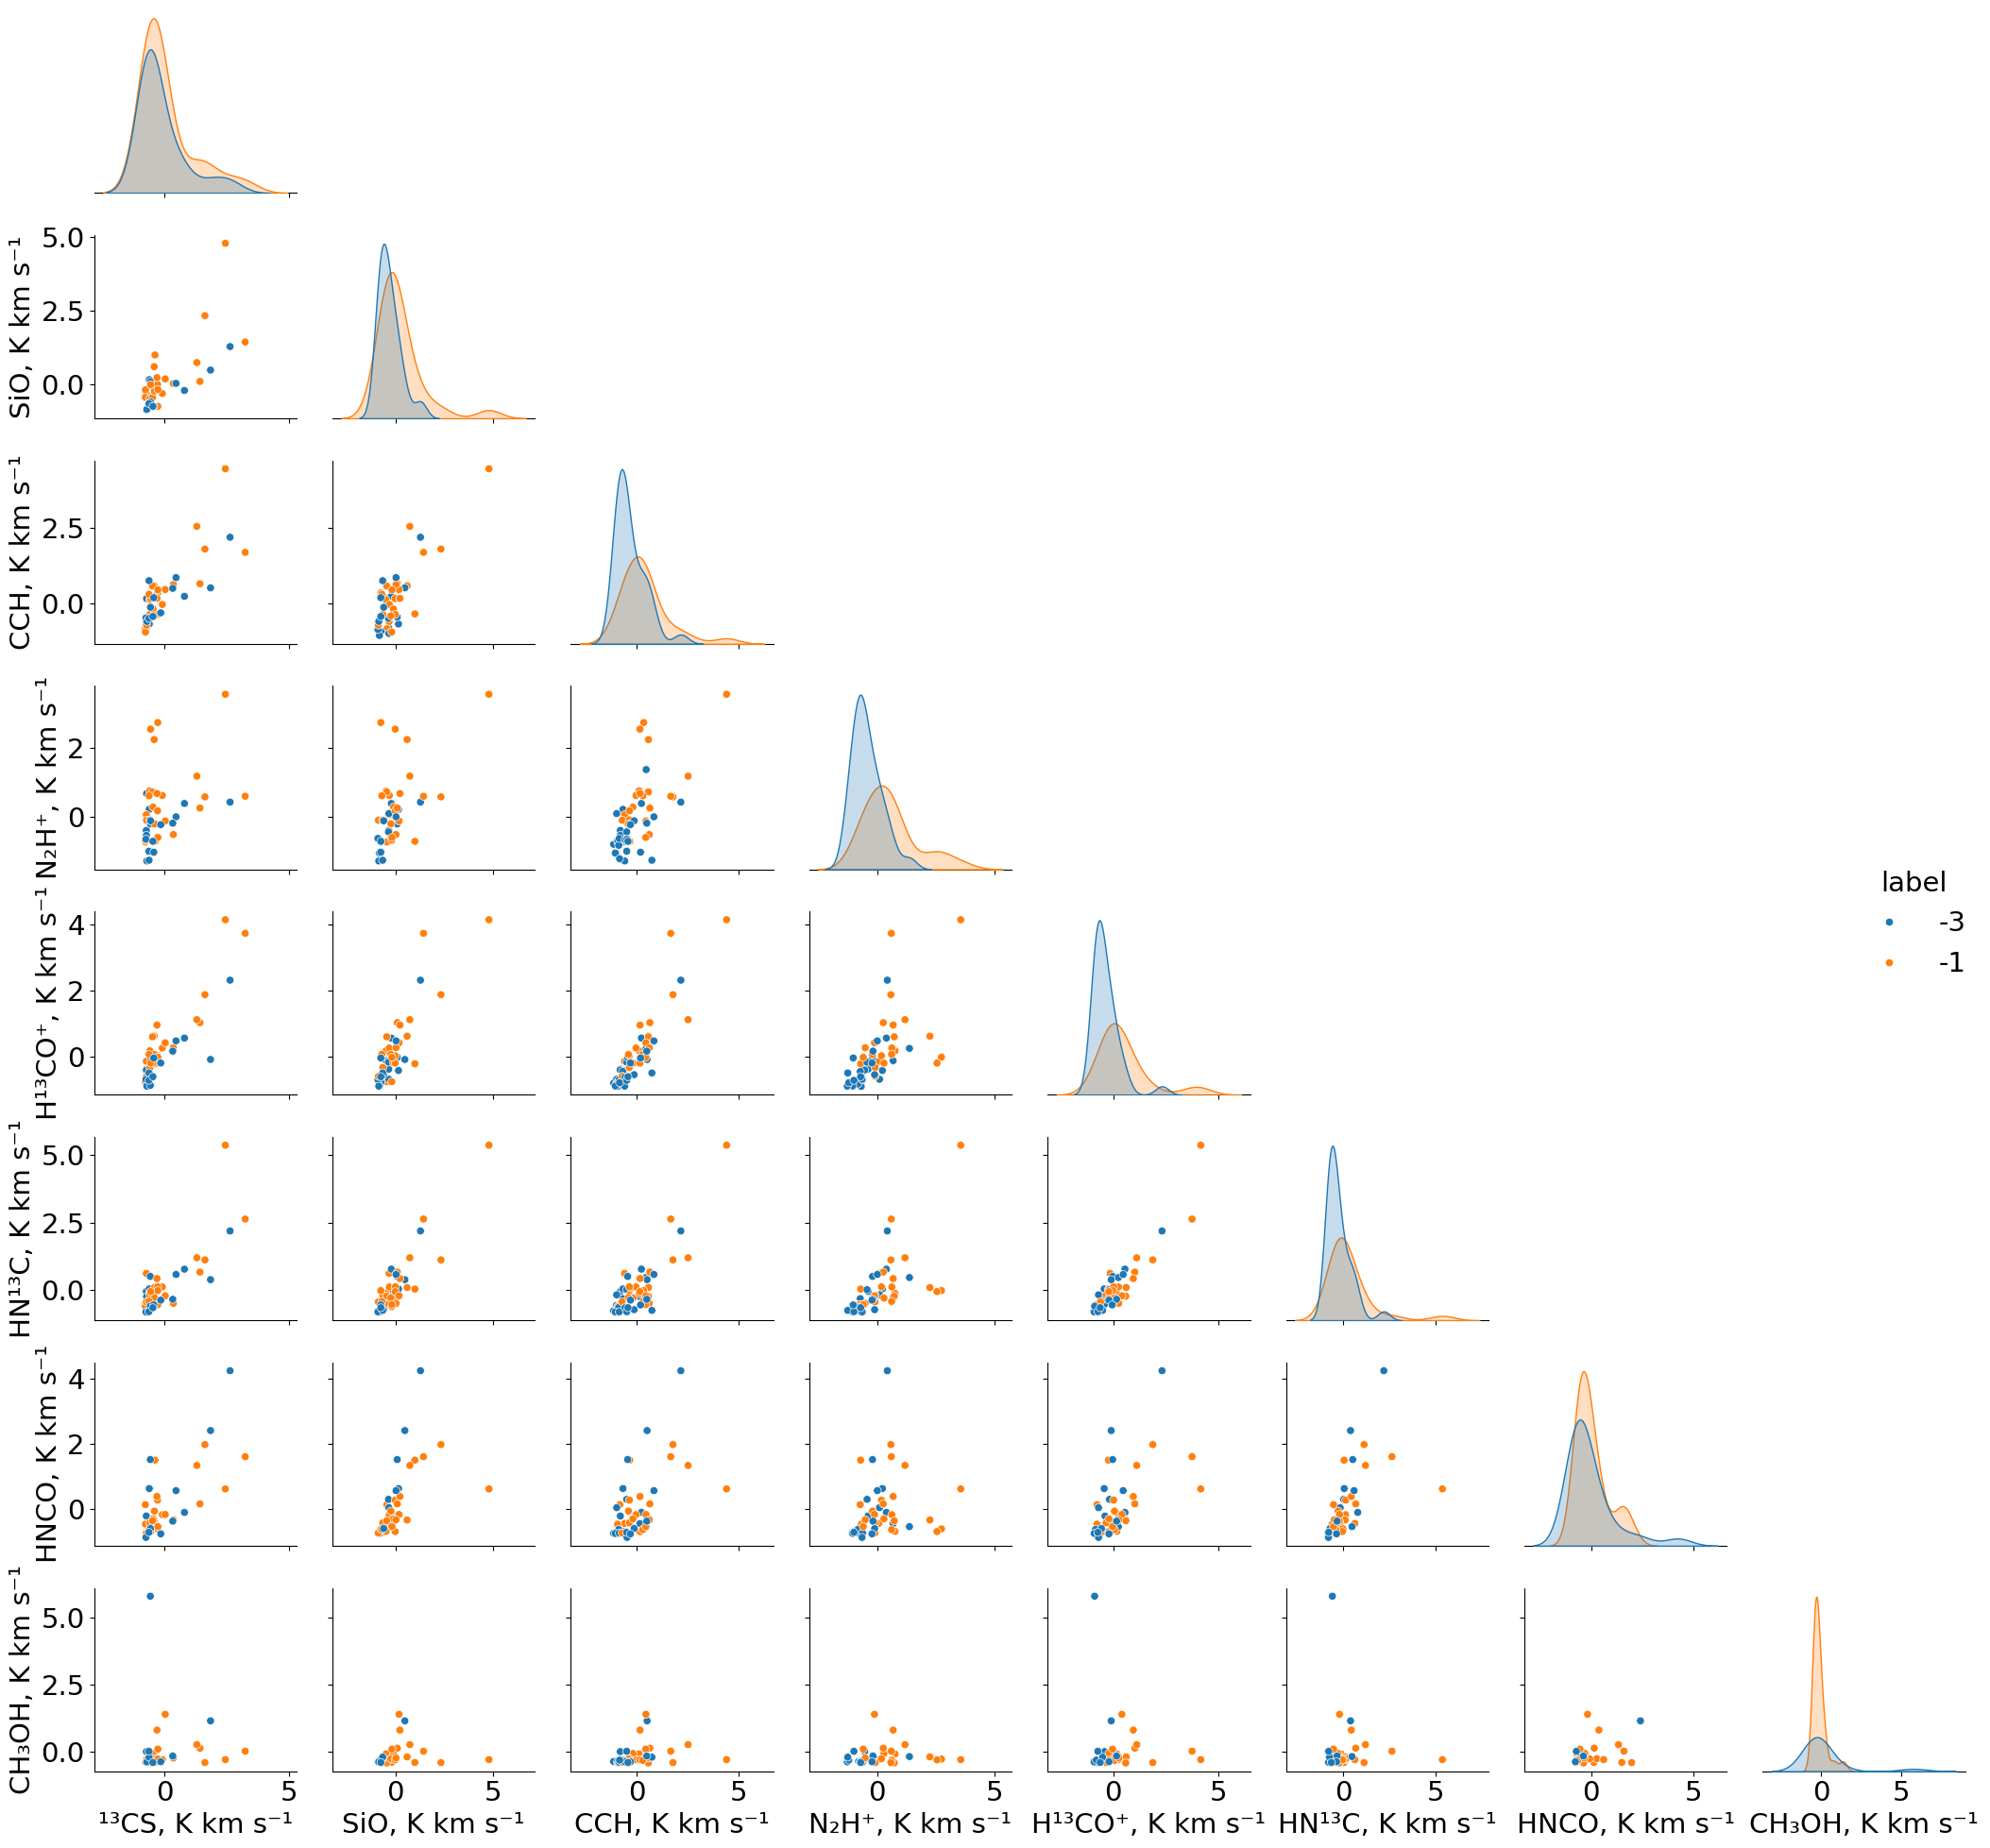

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['¹³CS, K km s⁻¹', 'SiO, K km s⁻¹', 'CCH, K km s⁻¹', 'N₂H⁺, K km s⁻¹', 'H¹³CO⁺, K km s⁻¹',
          #'HCN,K km s⁻¹',
          'HN¹³C, K km s⁻¹', 'HNCO, K km s⁻¹', 'CH₃OH, K km s⁻¹']#'CH₃CN K km s⁻¹', 'CH₃OH, K km s⁻¹']
df = pd.DataFrame(data_np, columns=labels)
data_pd = data_pd.reset_index()
df['Source'] = data_pd['Source']
df['label'] = pd.DataFrame(hdb.labels_)
sns.pairplot(df, corner=True, hue='label', palette='tab10') # colorblind Set1
plt.rcParams['font.size'] = '21'
#plt.subplots_adjust(left=0.001)
plt.tight_layout()
plt.savefig("distribution.svg", format='svg', dpi=1200)

In [137]:
clusters = df.groupby('label', group_keys=True)[['Source']].apply(lambda x: x)
pd.set_option('display.max_rows', None)